In [1]:
# Import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load all datasets for the analysis
city_list = pd.read_csv('./data/city_list.csv')
city_data = pd.read_csv('./data/city_data.csv')
global_data = pd.read_csv('./data/global_data.csv')

In [5]:
# Conduct preliminary investigation on loaded datasets
print(city_list.info(), city_data.info(), global_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345 entries, 0 to 344
Data columns (total 2 columns):
city       345 non-null object
country    345 non-null object
dtypes: object(2)
memory usage: 5.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71311 entries, 0 to 71310
Data columns (total 4 columns):
year        71311 non-null int64
city        71311 non-null object
country     71311 non-null object
avg_temp    68764 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB
None None None


In [6]:
# Write a function that imputes backward for missing values
def impute_backward(series):
    return series.fillna(series.bfill())

In [7]:
# Fill NaN with backward propagation
city_data.avg_temp = impute_backward(city_data.avg_temp)

In [8]:
# Create boolean series for China & Hong Kong
cn_temp = city_data['country'] == 'China'
hk_temp = city_data['country'] == 'Hong Kong'

In [39]:
# Identify cities that are the closest to my current location
print(city_data[cn_temp]['city'].value_counts())
print(city_data[hk_temp]['city'].value_counts())

Kunming      198
Qiqihar      194
Chengdu      194
Harbin       194
Taiyuan      194
Tianjin      194
Lanzhou      194
Datong       194
Changchun    194
Tangshan     194
Xian         194
Jilin        185
Dalian       185
Shenyang     185
Anshan       185
Luoyang      174
Jinan        174
Handan       174
Foshan       174
Guangzhou    174
Nanning      174
Guiyang      174
Changzhou    173
Hangzhou     173
Suzhou       173
Xuzhou       173
Nanchang     173
Nanjing      173
Wuxi         173
Hefei        173
Qingdao      173
Wuhan        173
Fuzhou       173
Shanghai     173
Name: city, dtype: int64
Shenzhen    174
Name: city, dtype: int64


In [16]:
# Filter out the target cities - Shenzhen, Guangzhou, Shanghai, Nanjing
shenzhen_temp = city_data[city_data.city == 'Shenzhen']
guangzhou_temp = city_data[city_data.city == 'Guangzhou']
shanghai_temp = city_data[city_data.city == 'Shanghai']
nanjing_temp = city_data[city_data.city == 'Nanjing']
global_temp = global_data[global_data.year >= 1840]

In [17]:
# Get the 10-Year Moving Average on target cities
shenzhen_temp_ma = shenzhen_temp['avg_temp'].rolling(10).mean()
guangzhou_temp_ma = guangzhou_temp['avg_temp'].rolling(10).mean()
shanghai_temp_ma = shanghai_temp['avg_temp'].rolling(10).mean()
nanjing_temp_ma = nanjing_temp['avg_temp'].rolling(10).mean()
global_temp_ma = global_temp['avg_temp'].rolling(10).mean()

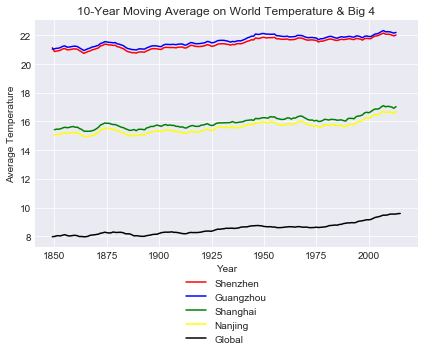

In [25]:
# Plot the temperatures
sns.set_style('darkgrid')
_ = plt.plot(shenzhen_temp['year'], shenzhen_temp_ma, color='red', label='Shenzhen')
_ = plt.plot(guangzhou_temp['year'], guangzhou_temp_ma, color='blue', label='Guangzhou')
_ = plt.plot(shanghai_temp['year'], shanghai_temp_ma, color='green', label='Shanghai')
_ = plt.plot(nanjing_temp['year'], nanjing_temp_ma, color='yellow', label='Nanjing')
_ = plt.plot(global_temp['year'], global_temp_ma, color='black', label='Global')

# Additional information for the graph and show it
_ = plt.xlabel('Year')
_ = plt.ylabel('Average Temperature')
_ = plt.title('10-Year Moving Average on World Temperature & Big 4')
_ = plt.legend(loc=9, bbox_to_anchor=(0.5, -0.1))
_ = plt.tight_layout()
plt.show()